Zomato Exploratory Data Analysis
---------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\all Dataset for analysis/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [4]:
df.shape

(51717, 17)

Cleaning Data
-------------------------------

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
# What is format function?
# format produces a string by formatting a number of other values according to a specification string
for feature in feature_na:
    print(' {} has {} missing values'.format(feature, np.round(df[feature].isnull().sum()/len(df)*100,4)))

# here 'feature' values goes to first empty slot and next calculation goes to next empty slot.


 rate has 15.0337 missing values
 phone has 2.3358 missing values
 location has 0.0406 missing values
 rest_type has 0.4389 missing values
 dish_liked has 54.2916 missing values
 cuisines has 0.087 missing values
 approx_cost(for two people) has 0.669 missing values


In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

we have to drop the 'nan' values from the rate column

In [9]:
df.dropna(axis = 'index',subset = ['rate'], inplace = True)

In [10]:
# check after dropping NAN values 
df.shape

(43942, 17)

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

now we will remove '/' from the rate values.

In [12]:
# creating a split function to remove '/'
def split(x):
    return x.split('/')[0]

In [13]:
# we can also put the function inside apply method if it does work we can do like this:
df['rate'] = df['rate'].apply(lambda text: text.split("/")[0])

In [14]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [16]:
df.replace('NEW', 0, inplace=True)
df.replace('-', 0, inplace=True)

In [17]:
# change rate dtype to float
df['rate'] = df['rate'].astype(float)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Calculate average rating of each restaurant
----------------------------------------------------------------

In [18]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns = ['restaurant', 'avg_rating']
df_rate.head(4)

,restaurant,avg_rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2


Get distribution of rating column & find what distribution this feature support
-------------------------------

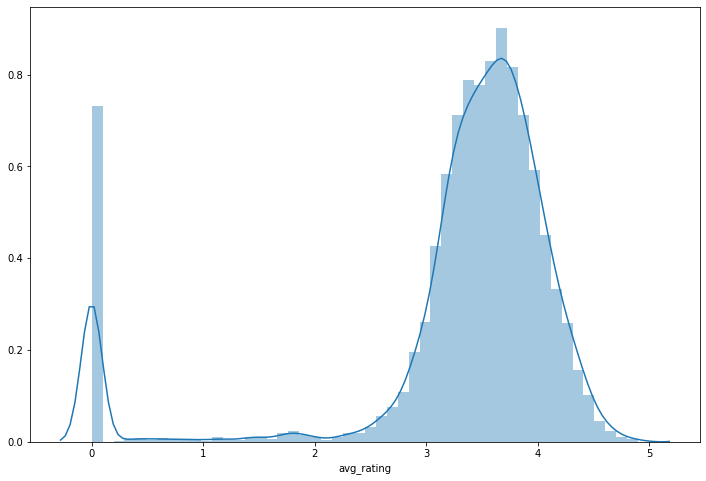

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(df_rate['avg_rating'])

we can see maximum restaurant have rating between 3.5-4.5

Top restaurant chains
-------------------------------

In [20]:
# value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
chains = df['name'].value_counts()[0:20]
chains

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Five Star Chicken      68
Just Bake              68
Kanti Sweets           68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Sweet Truth            60
Beijing Bites          60
Domino's Pizza         60
KFC                    60
Subway                 59
Smoor                  59
McDonald's             59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

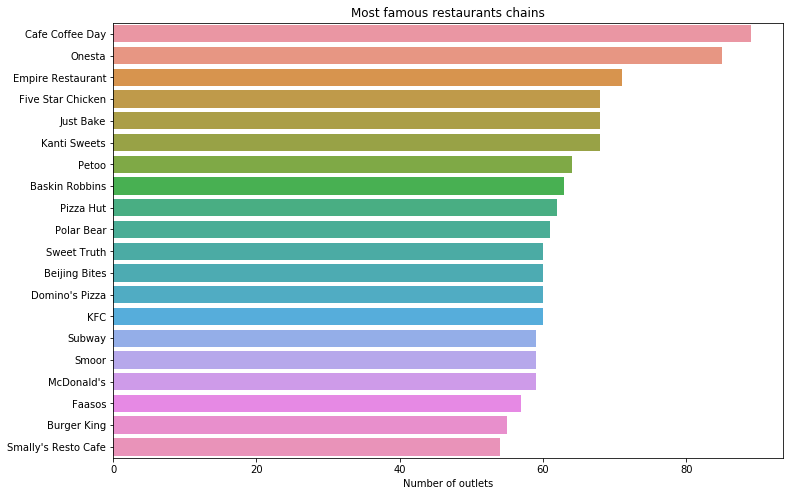

In [21]:
plt.figure(figsize =(12,8))
sns.barplot(x=chains, y=chains.index)
plt.title("Most famous restaurants chains")
plt.xlabel('Number of outlets')

How many doesn't accept online order
-------------------------------

In [22]:
online_res = df['online_order'].value_counts()
online_res

Yes    28308
No     15634
Name: online_order, dtype: int64

In [23]:
labels = ['accepted', 'not accepted']
plt.figure(figsize =(12,8))
px.pie(df,values = online_res, labels = labels, title = 'Pie Chart')

<Figure size 864x576 with 0 Axes>

Ratio of restaurants available with dine in.
------

In [24]:
# check how many has dine in options
dinein = df['book_table'].value_counts()
dinein

No     37509
Yes     6433
Name: book_table, dtype: int64

In [25]:
import plotly.graph_objs as go 
from plotly.offline import iplot 

In [26]:
label = ['not booked', 'booked']
trace = go.Pie(labels = label, values = dinein, hoverinfo = 'label + percent', textinfo = 'value')
iplot([trace])

Types of restaurant
-------------------------------

In [27]:
# check restaurant type with na values and dropping.
df['rest_type'].isna().sum()
df['rest_type'].dropna(inplace=True)

In [28]:
len(df['rest_type'].unique())

87

In [29]:
type_trace = go.Bar(x = df['rest_type'].value_counts().nlargest(20).index,
        y= df['rest_type'].value_counts().nlargest(20))

In [30]:
iplot([type_trace])

highest voted restaurant
-----------------------------

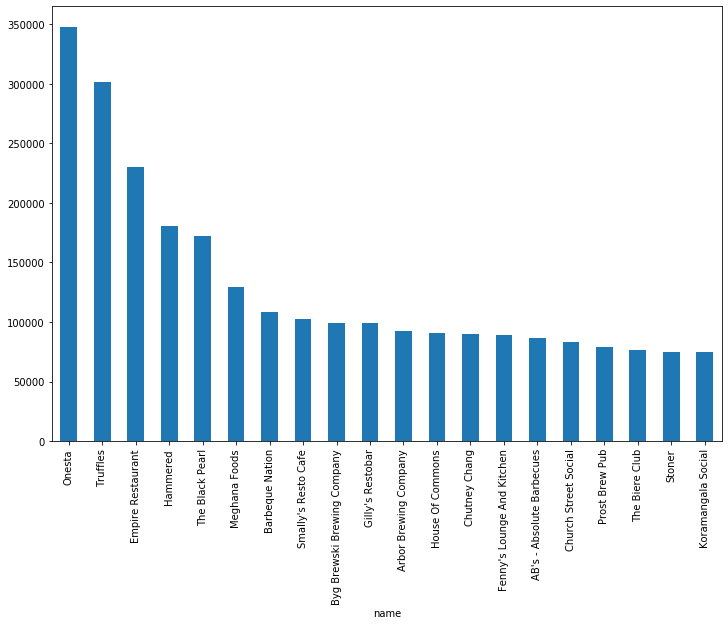

In [31]:
plt.figure(figsize =(12,8))
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

In [32]:
# using iplot
trace_rating = go.Bar(x = df.groupby('name')['votes'].sum().nlargest(20).index,
y = df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace_rating])

Location tracing
----------------------------------------------------------------

In [33]:
restaurant=[]
location =[]
for key, location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [34]:
df_total = pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.head()

,location,restaurant
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [35]:
df_total.set_index('location', inplace=True)
df_total.head()

,restaurant
location,
BTM,581
Banashankari,238
Banaswadi,151
Bannerghatta Road,362
Basavanagudi,195


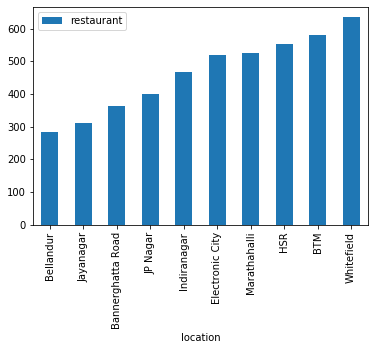

In [36]:
df_total.sort_values(by = 'restaurant').tail(10).plot.bar()

Finding cuisines available
------

In [37]:
cuisines = df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [38]:
trace_cuisine = go.Bar(
    x = df['cuisines'].value_counts()[0:10].index,
    y = df['cuisines'].value_counts()[0:10]
)
iplot([trace_cuisine])

Approax cost of 2 people 
-----

In [39]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [40]:
# check missing values 
df['approx_cost(for two people)'].isna().sum()

252

In [41]:
# dropping NA values
df.dropna(axis = 'index', subset = ['approx_cost(for two people)'], inplace = True)

In [42]:
# checking dtypes  
df['approx_cost(for two people)'].dtype

dtype('O')

In [43]:
# checking dtypes  
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [44]:
# this function removes ',' from all the values and replace with none
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',', ''))

In [45]:
# checking dtypes  
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [46]:
# converting dtypes from object to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)
df['approx_cost(for two people)'].dtypes

dtype('int32')

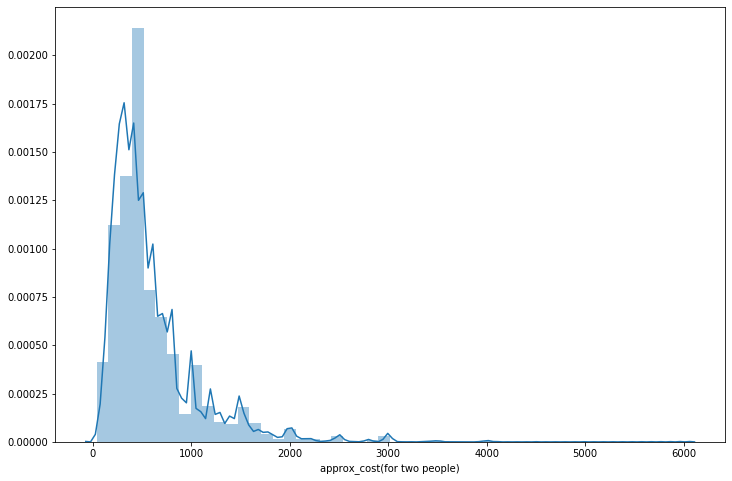

In [48]:
plt.figure(figsize=(12,8))
sns.distplot(df['approx_cost(for two people)'])

we can see majority restaurant cost 500-1000 for two people meal.

cost of 2 people vs rating
----------------------------------------------------------------

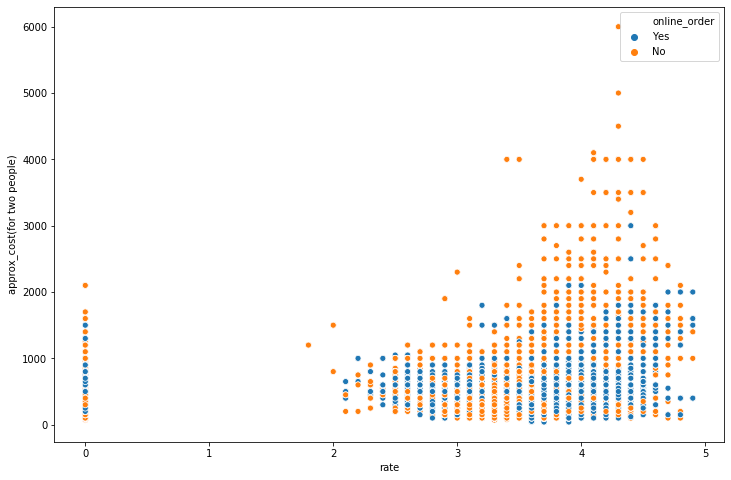

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'rate', y = 'approx_cost(for two people)', hue = 'online_order', data = df)

Difference between offline and online order options
-----------------------------

In [53]:
px.box(df, x = 'online_order', y = 'votes')

<Figure size 864x576 with 0 Axes>

In [52]:
px.box(df, x = 'online_order', y = 'approx_cost(for two people)')